# Carregamento e Tratamento

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

years = [2015, 2016, 2017, 2018, 2019]

import pandas as pd

years = [2015, 2016, 2017, 2018, 2019]

for year in years:
    df = pd.read_csv(f"{year}.csv")
    print(f"\n===== COLUNAS {year} =====")
    print(list(df.columns))


===== COLUNAS 2015 =====
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

===== COLUNAS 2016 =====
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

===== COLUNAS 2017 =====
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

===== COLUNAS 2018 =====
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

=

In [30]:
for year in years:
    dfs[year] = pd.read_csv(f"{year}.csv")

def padroniza_colunas(df, year):
    if year in [2015, 2016]:
        df = df.rename(columns={
            "Country": "Country",
            "Happiness Score": "Happiness Score",
            "Economy (GDP per Capita)": "GDP per Capita",
            "Health (Life Expectancy)": "Life Expectancy",
            "Freedom": "Freedom"
        })

    elif year == 2017:
        df = df.rename(columns={
            "Country": "Country",
            "Happiness.Score": "Happiness Score",
            "Economy..GDP.per.Capita.": "GDP per Capita",
            "Health..Life.Expectancy.": "Life Expectancy",
            "Freedom": "Freedom"
        })

    elif year in [2018, 2019]:
        df = df.rename(columns={
            "Country or region": "Country",
            "Score": "Happiness Score",
            "GDP per capita": "GDP per Capita",
            "Healthy life expectancy": "Life Expectancy",
            "Freedom to make life choices": "Freedom"
        })

    return df

for year in years:
    dfs[year] = padroniza_colunas(dfs[year], year)

## Exploração inicial

## ===== Países mais e menos felizes por ano =====

In [33]:
print("===== Países mais e menos felizes por ano =====\n")

for year, df in dfs.items():
    print(f"--- {year} | TOP 10 mais felizes ---")
    top10 = df.sort_values("Happiness Score", ascending=False).head(10)
    print(
        top10[
            ["Country", "Happiness Score", "GDP per Capita", "Life Expectancy", "Freedom"]
        ].reset_index(drop=True)
    )

    print(f"\n--- {year} | TOP 10 menos felizes ---")
    bottom10 = df.sort_values("Happiness Score", ascending=True).head(10)
    print(
        bottom10[
            ["Country", "Happiness Score", "GDP per Capita", "Life Expectancy", "Freedom"]
        ].reset_index(drop=True)
    )

    print("\n")

===== Países mais e menos felizes por ano =====

--- 2015 | TOP 10 mais felizes ---
       Country  Happiness Score  GDP per Capita  Life Expectancy  Freedom
0  Switzerland            7.587         1.39651          0.94143  0.66557
1      Iceland            7.561         1.30232          0.94784  0.62877
2      Denmark            7.527         1.32548          0.87464  0.64938
3       Norway            7.522         1.45900          0.88521  0.66973
4       Canada            7.427         1.32629          0.90563  0.63297
5      Finland            7.406         1.29025          0.88911  0.64169
6  Netherlands            7.378         1.32944          0.89284  0.61576
7       Sweden            7.364         1.33171          0.91087  0.65980
8  New Zealand            7.286         1.25018          0.90837  0.63938
9    Australia            7.284         1.33358          0.93156  0.65124

--- 2015 | TOP 10 menos felizes ---
        Country  Happiness Score  GDP per Capita  Life Expectancy

## ===== Evolução da felicidade média global =====

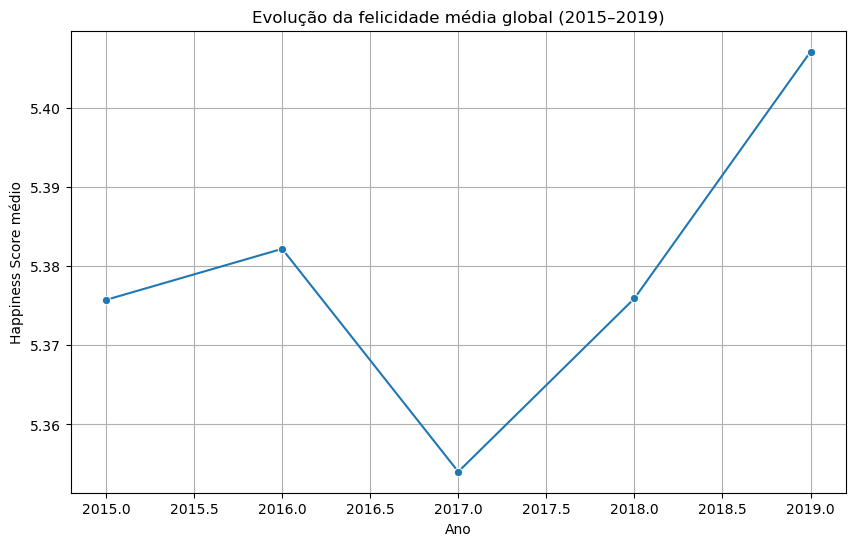

In [40]:
global_avg = {}

for year, df in dfs.items():
    df["Happiness Score"] = pd.to_numeric(df["Happiness Score"], errors="coerce")
    global_avg[year] = df["Happiness Score"].mean()

plt.figure(figsize=(10,6))
sns.lineplot(
    x=list(global_avg.keys()),
    y=list(global_avg.values()),
    marker="o"
)

plt.title("Evolução da felicidade média global (2015–2019)")
plt.xlabel("Ano")
plt.ylabel("Happiness Score médio")
plt.grid(True)
plt.show()

## ===== Relação entre fatores e felicidade =====

Como PIB, apoio social, expectativa de vida e liberdade influenciam a felicidade

C:\Users\amand\AppData\Local\Temp\ipykernel_2932\895589268.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


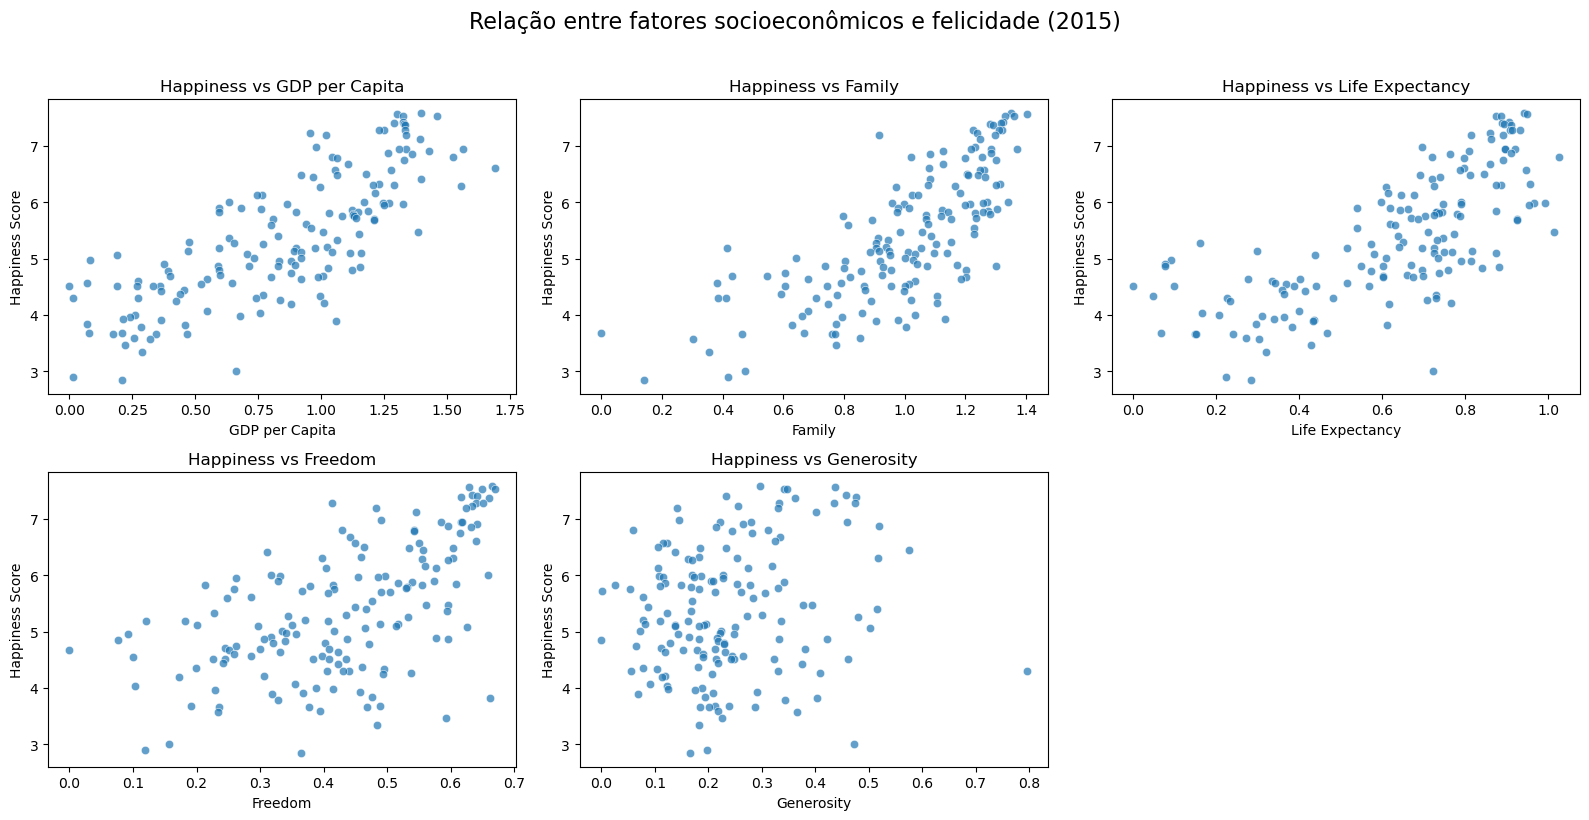

C:\Users\amand\AppData\Local\Temp\ipykernel_2932\895589268.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


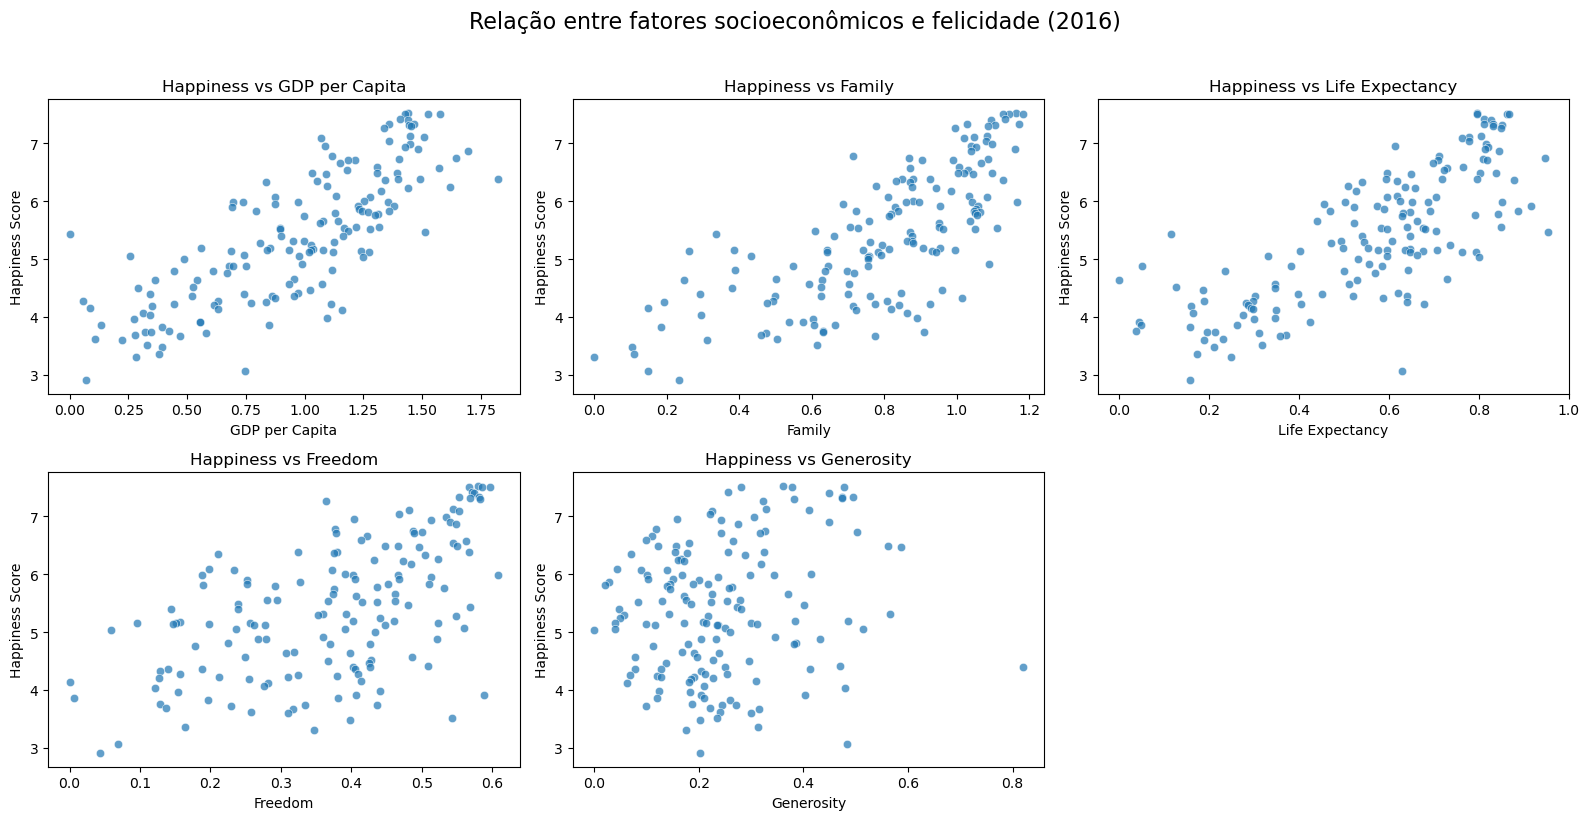

C:\Users\amand\AppData\Local\Temp\ipykernel_2932\895589268.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


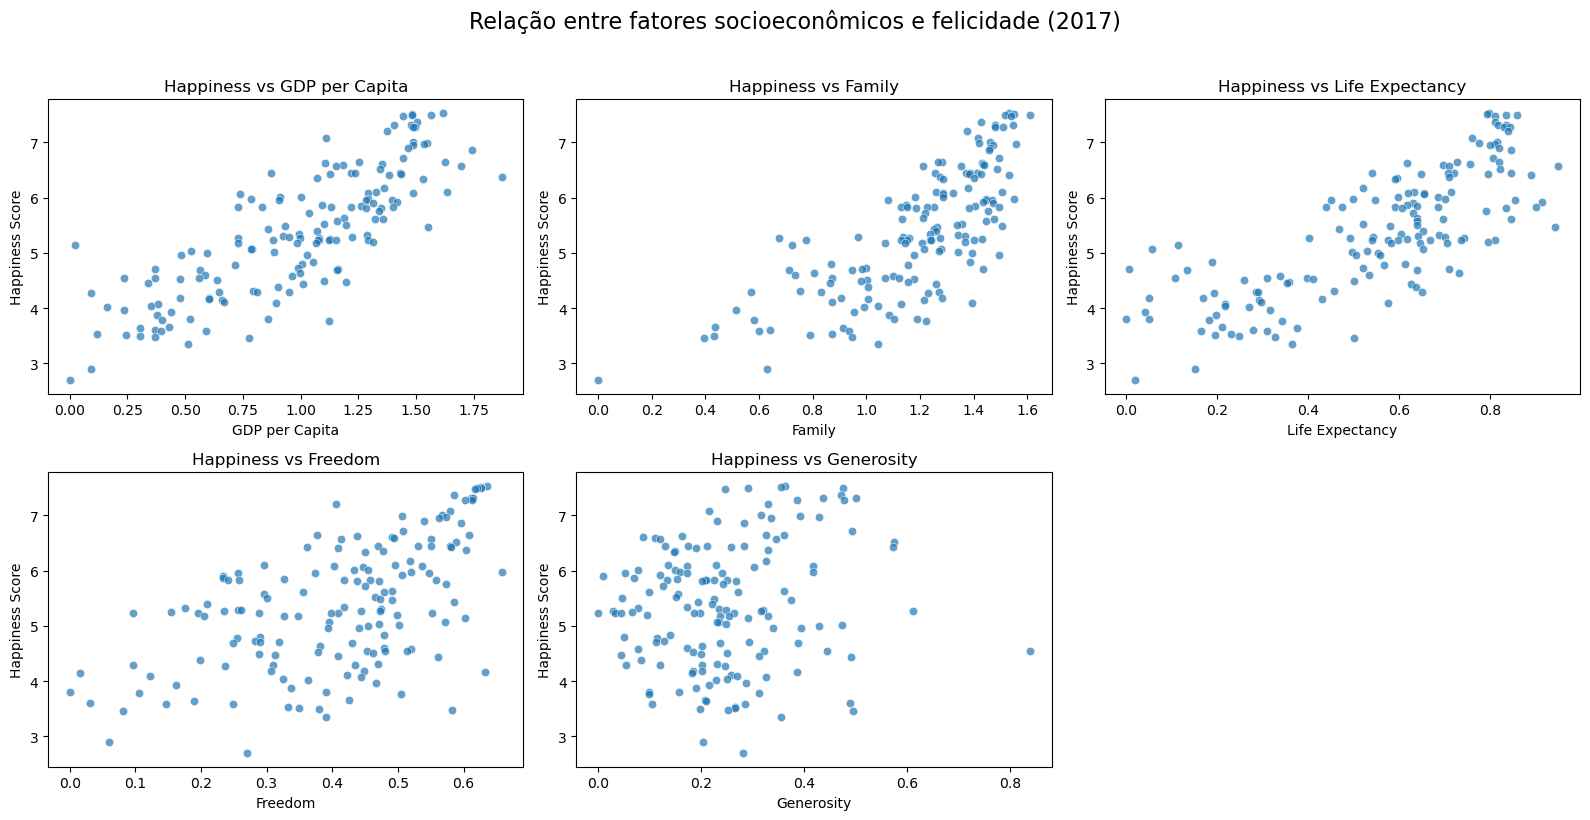

C:\Users\amand\AppData\Local\Temp\ipykernel_2932\895589268.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


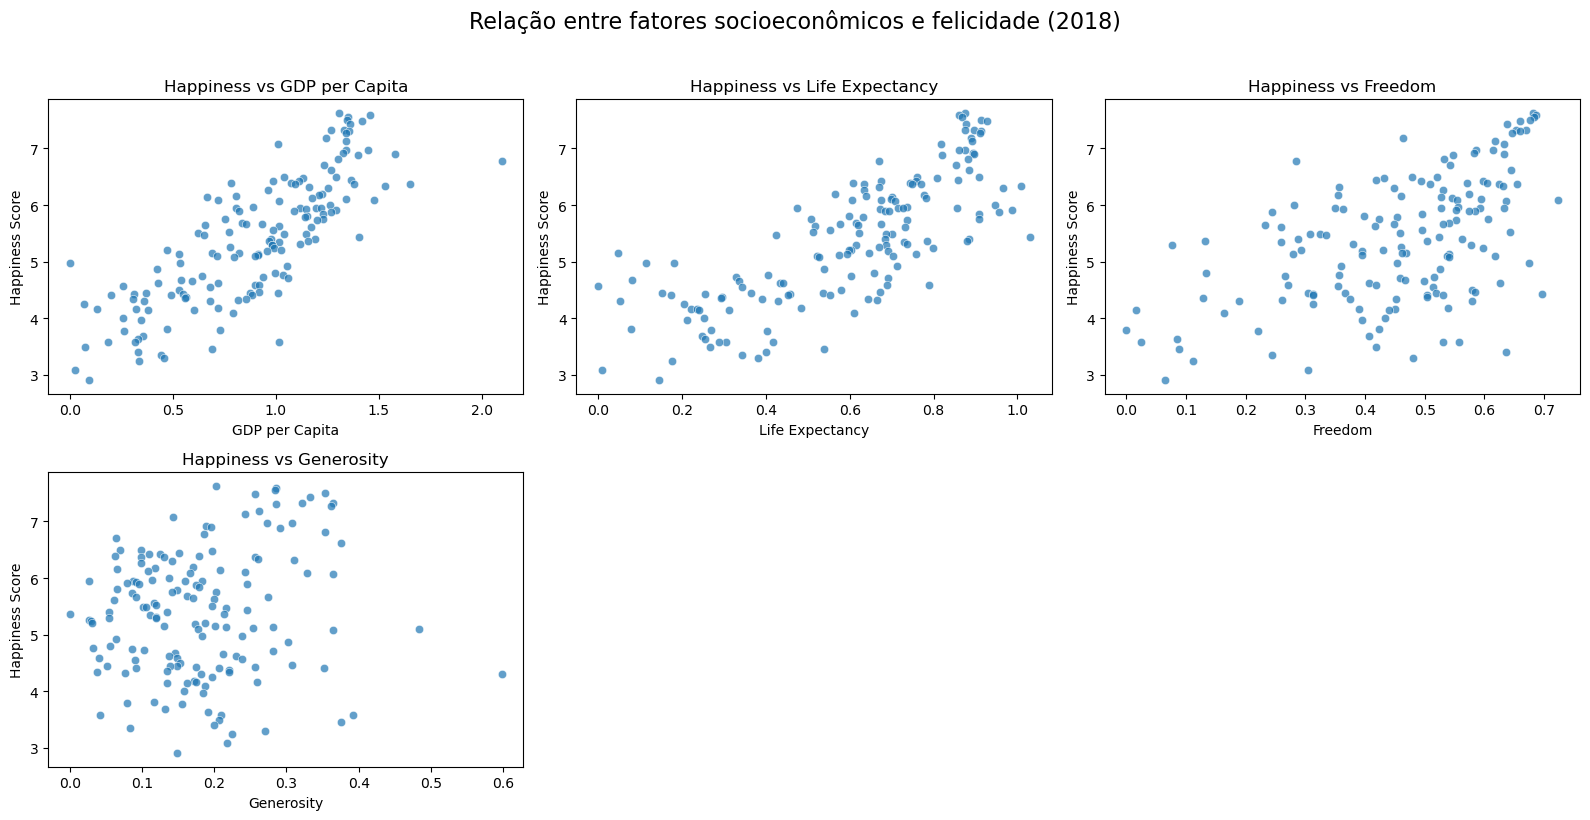

C:\Users\amand\AppData\Local\Temp\ipykernel_2932\895589268.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


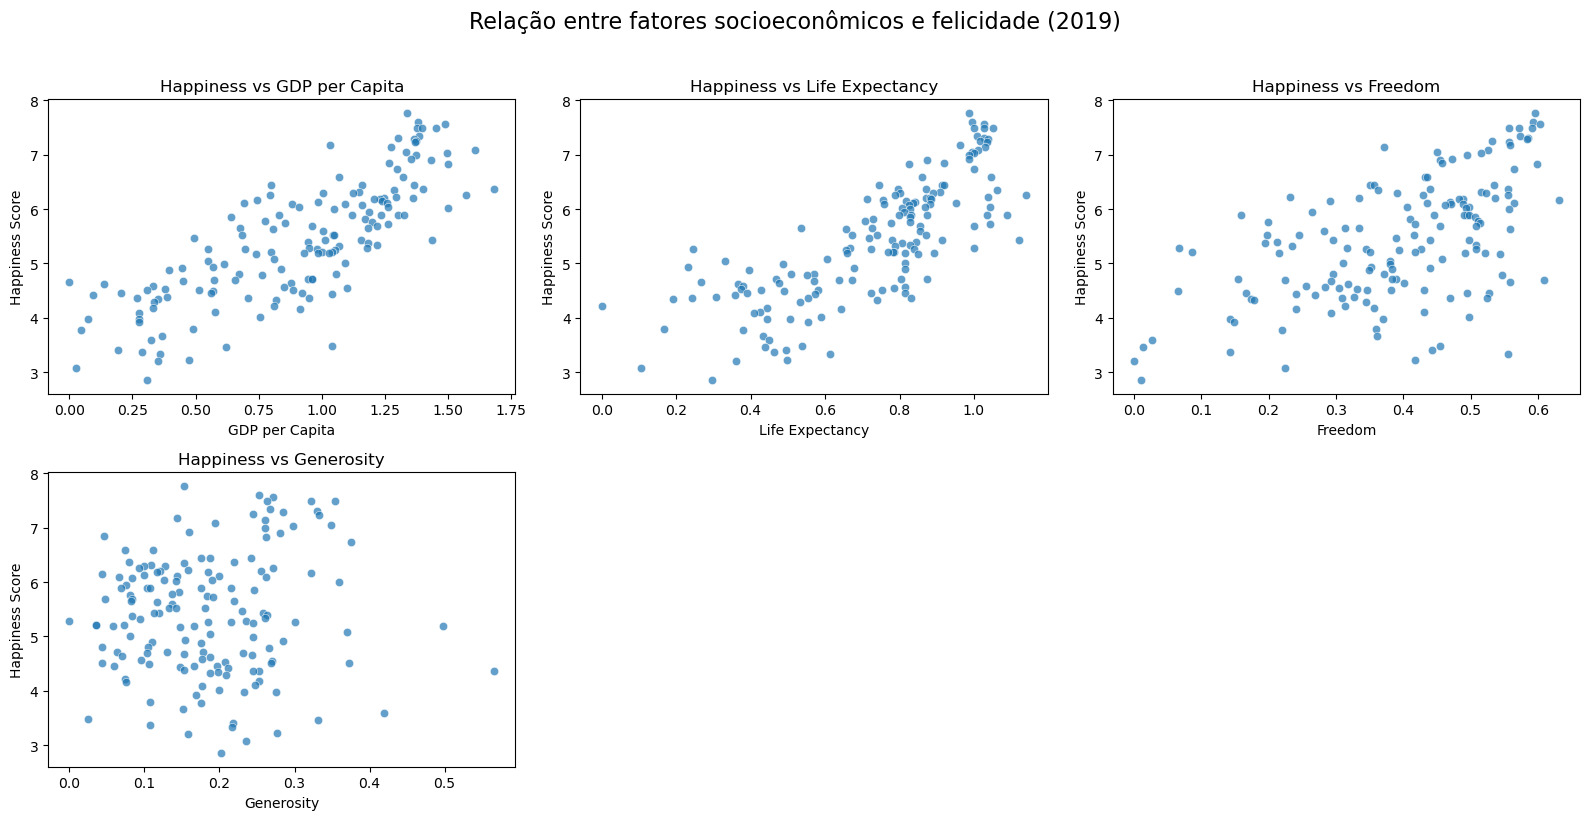

In [48]:
factors = [
    "GDP per Capita",
    "Family",
    "Life Expectancy",
    "Freedom",
    "Generosity",
]

for year in years:
    df = dfs[year]

    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="ignore")

    available_factors = [f for f in factors if f in df.columns]

    plt.figure(figsize=(16, 8))

    for i, factor in enumerate(available_factors):
        plt.subplot(2, 3, i + 1)
        sns.scatterplot(
            data=df,
            x=factor,
            y="Happiness Score",
            alpha=0.7
        )
        plt.title(f"Happiness vs {factor}")
        plt.xlabel(factor)
        plt.ylabel("Happiness Score")

    plt.suptitle(
        f"Relação entre fatores socioeconômicos e felicidade ({year})",
        fontsize=16,
        y=1.02
    )

    plt.tight_layout()
    plt.show()

### 📊 Relação entre fatores socioeconômicos e felicidade (2015–2019)

Nesta etapa do projeto, foi analisada a relação entre o **Happiness Score** e diferentes fatores socioeconômicos ao longo dos anos de **2015 a 2019**, utilizando gráficos de dispersão (*scatter plots*).

Para cada ano, foram gerados automaticamente até **5 gráficos**, considerando apenas os fatores disponíveis em cada dataset, garantindo consistência e evitando erros por ausência de variáveis.

### 🎯 Fatores analisados
- **GDP per Capita** (PIB per capita)
- **Family / Social Support** (Apoio social)
- **Life Expectancy** (Expectativa de vida)
- **Freedom** (Liberdade de escolhas)
- **Generosity** (Generosidade)

---

### 🔍 Principais insights

### 💰 GDP per Capita
Observa-se uma **correlação positiva clara** entre o PIB per capita e o Happiness Score em todos os anos analisados.  
Países com maior renda média tendem a apresentar níveis mais elevados de felicidade, embora o crescimento não seja perfeitamente linear.

---

### 👨‍👩‍👧‍👦 Apoio social (Family)
O apoio social é um dos fatores **mais fortemente associados à felicidade**.  
Países com maiores índices de suporte familiar e social concentram os maiores Happiness Scores, com menor dispersão nos valores.

---

### 🏥 Expectativa de vida
A expectativa de vida saudável também apresenta **forte relação positiva** com a felicidade.  
Países com melhores condições de saúde e longevidade tendem a apresentar maior bem-estar geral da população.

---

### 🕊️ Liberdade
A liberdade para fazer escolhas de vida mostra uma **relação positiva moderada** com a felicidade.  
Embora não seja o fator mais determinante isoladamente, contribui de forma consistente para níveis mais altos de bem-estar.

---

### 🎁 Generosidade
A relação entre generosidade e felicidade é **mais difusa**.  
Apesar de países mais felizes tenderem a apresentar níveis razoáveis de generosidade, o fator demonstra maior variabilidade e menor poder explicativo isolado.

---

### 📌 Conclusão geral

A análise ao longo dos cinco anos mostra que:
- **PIB per capita, apoio social e expectativa de vida** são os fatores mais fortemente relacionados à felicidade
- A **liberdade individual** atua como fator complementar relevante
- **Generosidade** apresenta impacto mais contextual e indireto

Esses resultados indicam que a felicidade é um fenômeno **multidimensional**, dependente tanto de condições econômicas quanto sociais e institucionais.

---

## ===== Evolução da felicidade ao longo dos anos =====

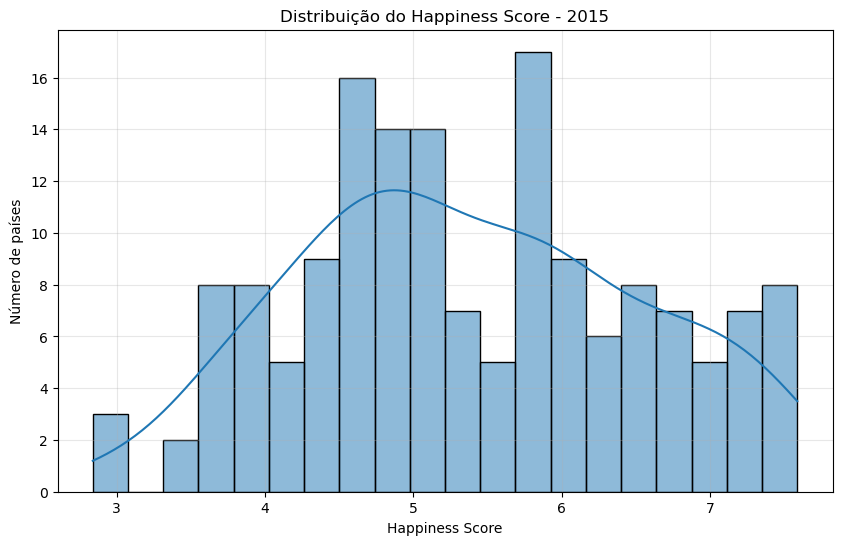

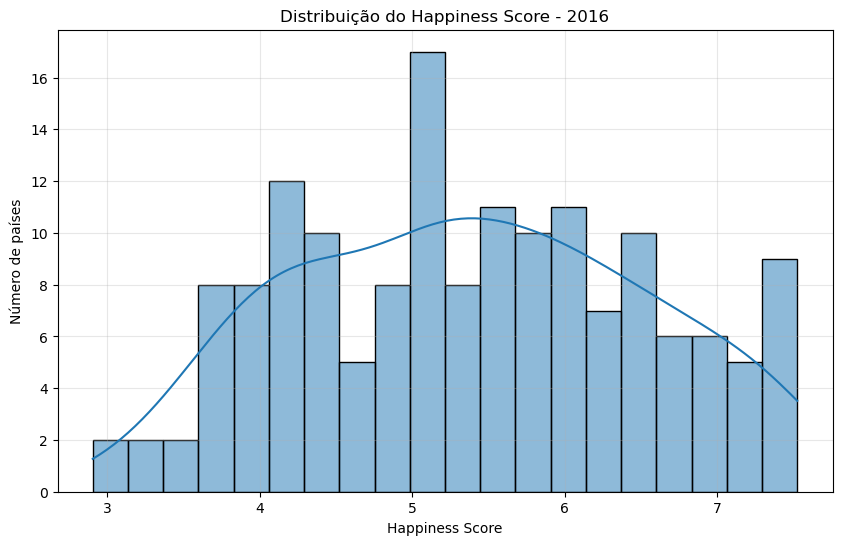

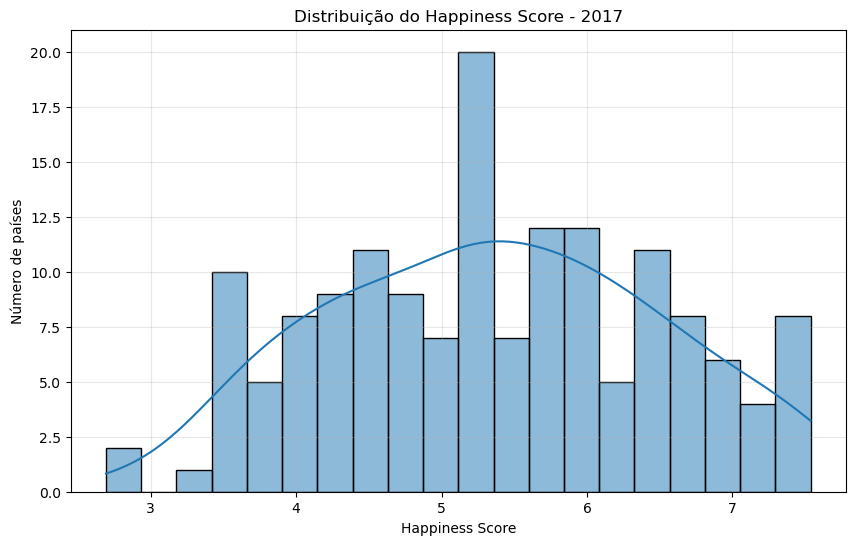

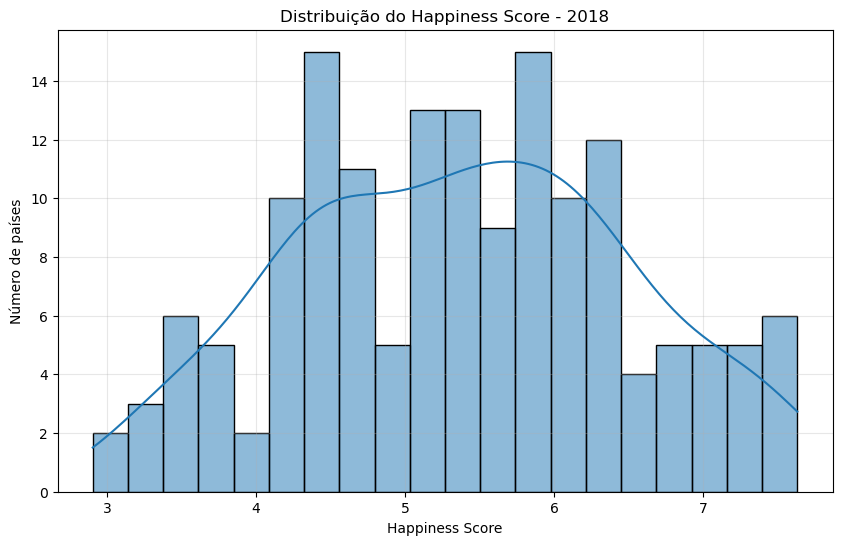

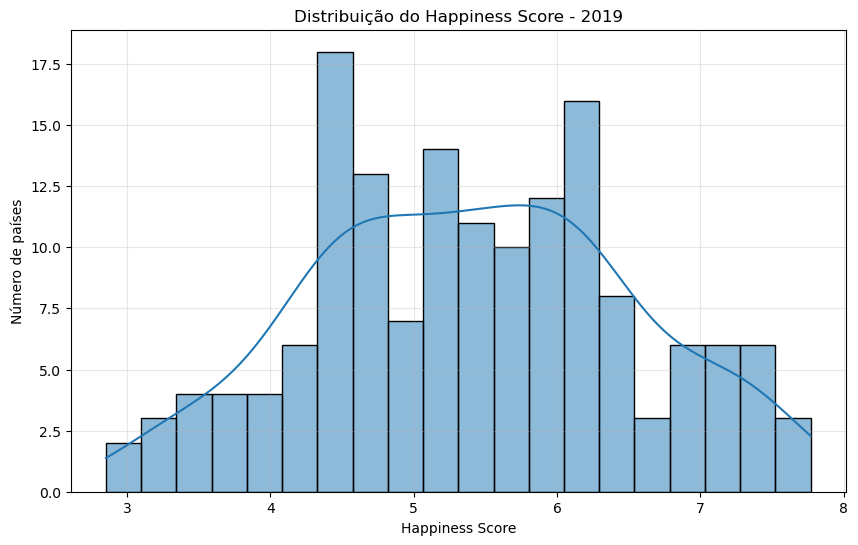

In [65]:
anos = [2015, 2016, 2017, 2018, 2019]

dfs = {}
for ano in anos:
    df = pd.read_csv(f"{ano}.csv")
    df.columns = df.columns.str.strip()  
    dfs[ano] = df

happiness_col_map = {
    2015: "Happiness Score",
    2016: "Happiness Score",
    2017: "Happiness.Score",
    2018: "Score",
    2019: "Score"
}

for ano in anos:
    df = dfs[ano]
    col = happiness_col_map[ano]

    df[col] = pd.to_numeric(df[col], errors="coerce")

    plt.figure(figsize=(10,6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribuição do Happiness Score - {ano}")
    plt.xlabel("Happiness Score")
    plt.ylabel("Número de países")
    plt.grid(alpha=0.3)
    plt.show()

### O que você pode observar nos gráficos

- 2015–2017: distribuições mais concentradas, com menos valores extremos

- 2018–2019: leve deslocamento da distribuição para valores mais altos

- A maioria dos países se concentra entre 4 e 6 pontos

- Poucos países atingem valores acima de 7, mostrando que felicidade extrema é rara

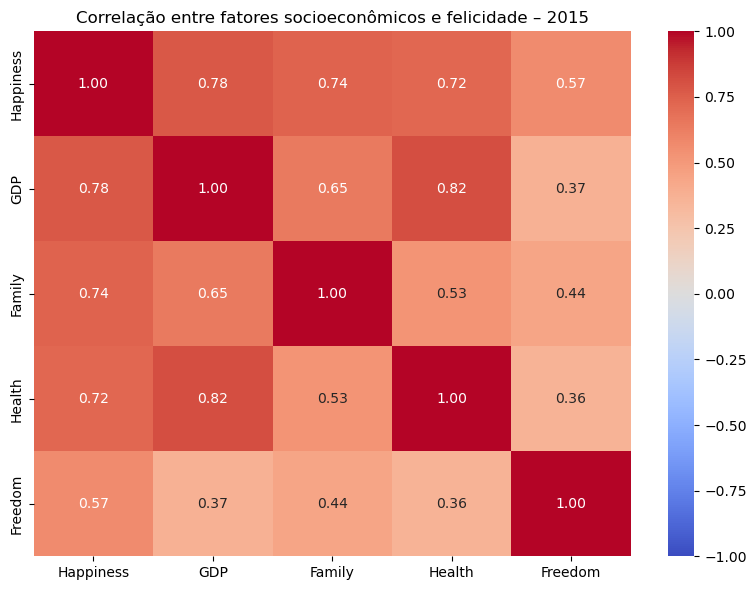

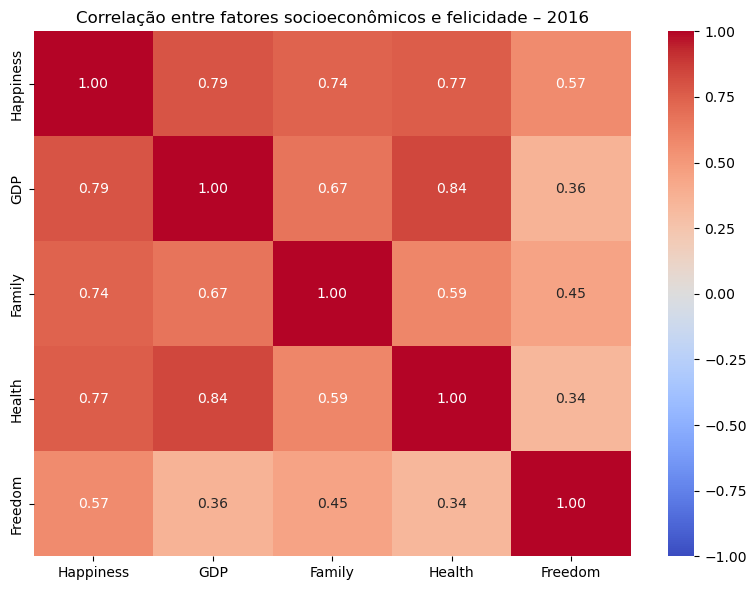

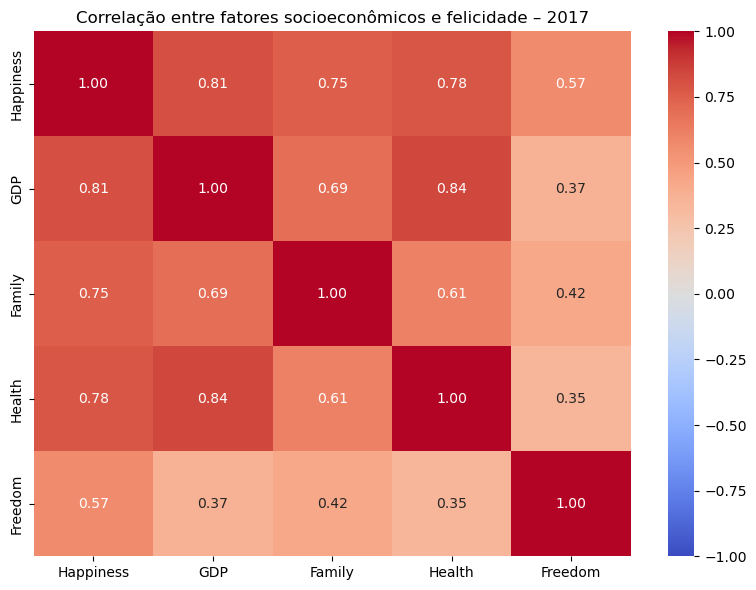

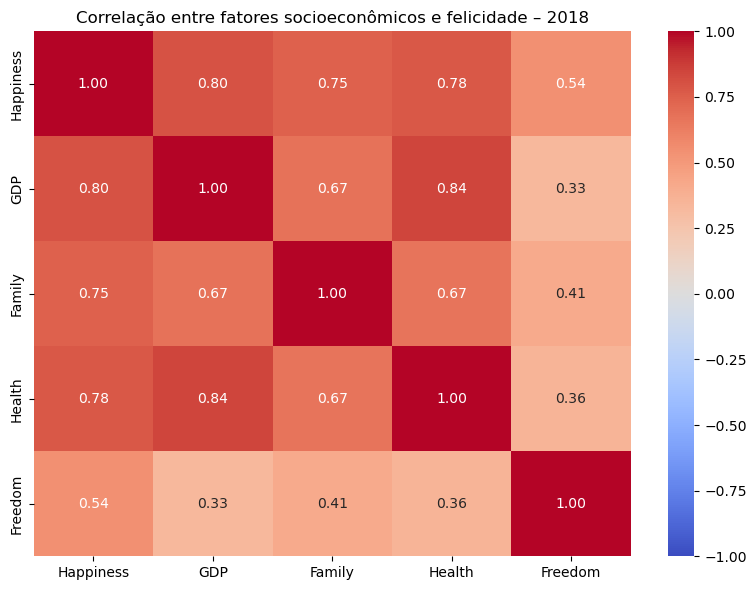

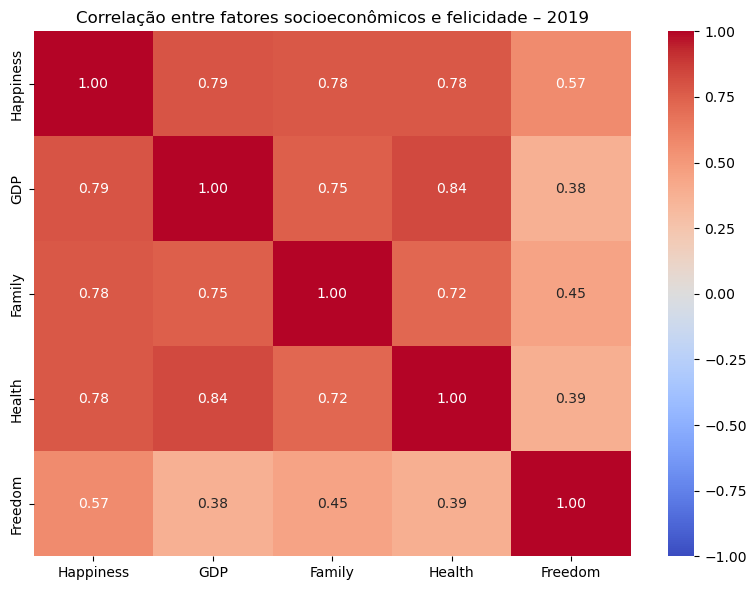

In [69]:
anos = [2015, 2016, 2017, 2018, 2019]

dfs = {}
for ano in anos:
    df = pd.read_csv(f"{ano}.csv")
    df.columns = df.columns.str.strip()
    dfs[ano] = df

col_map = {
    2015: {
        "happiness": "Happiness Score",
        "gdp": "Economy (GDP per Capita)",
        "family": "Family",
        "health": "Health (Life Expectancy)",
        "freedom": "Freedom"
    },
    2016: {
        "happiness": "Happiness Score",
        "gdp": "Economy (GDP per Capita)",
        "family": "Family",
        "health": "Health (Life Expectancy)",
        "freedom": "Freedom"
    },
    2017: {
        "happiness": "Happiness.Score",
        "gdp": "Economy..GDP.per.Capita.",
        "family": "Family",
        "health": "Health..Life.Expectancy.",
        "freedom": "Freedom"
    },
    2018: {
        "happiness": "Score",
        "gdp": "GDP per capita",
        "family": "Social support",
        "health": "Healthy life expectancy",
        "freedom": "Freedom to make life choices"
    },
    2019: {
        "happiness": "Score",
        "gdp": "GDP per capita",
        "family": "Social support",
        "health": "Healthy life expectancy",
        "freedom": "Freedom to make life choices"
    }
}

for ano in anos:
    df = dfs[ano]
    cols = col_map[ano]

    for col in cols.values():
        df[col] = pd.to_numeric(df[col], errors="coerce")

    corr_df = df[
        [
            cols["happiness"],
            cols["gdp"],
            cols["family"],
            cols["health"],
            cols["freedom"]
        ]
    ].corr()

    corr_df.columns = ["Happiness", "GDP", "Family", "Health", "Freedom"]
    corr_df.index = ["Happiness", "GDP", "Family", "Health", "Freedom"]

    plt.figure(figsize=(8,6))
    sns.heatmap(
        corr_df,
        annot=True,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        fmt=".2f"
    )
    plt.title(f"Correlação entre fatores socioeconômicos e felicidade – {ano}")
    plt.tight_layout()
    plt.show()